In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv("./Datasets/train.csv")
test = pd.read_csv("./Datasets/test.csv")

In [4]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


(None, (30200, 14))

In [5]:
test.info(), test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12943 entries, 0 to 12942
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       12943 non-null  object 
 1   가입일      12943 non-null  int64  
 2   음성사서함이용  12943 non-null  int64  
 3   주간통화시간   12943 non-null  float64
 4   주간통화횟수   12943 non-null  int64  
 5   주간통화요금   12943 non-null  float64
 6   저녁통화시간   12943 non-null  float64
 7   저녁통화횟수   12943 non-null  int64  
 8   저녁통화요금   12943 non-null  float64
 9   밤통화시간    12943 non-null  float64
 10  밤통화횟수    12943 non-null  int64  
 11  밤통화요금    12943 non-null  float64
 12  상담전화건수   12943 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 1.3+ MB


(None, (12943, 13))

In [6]:
train.head()

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


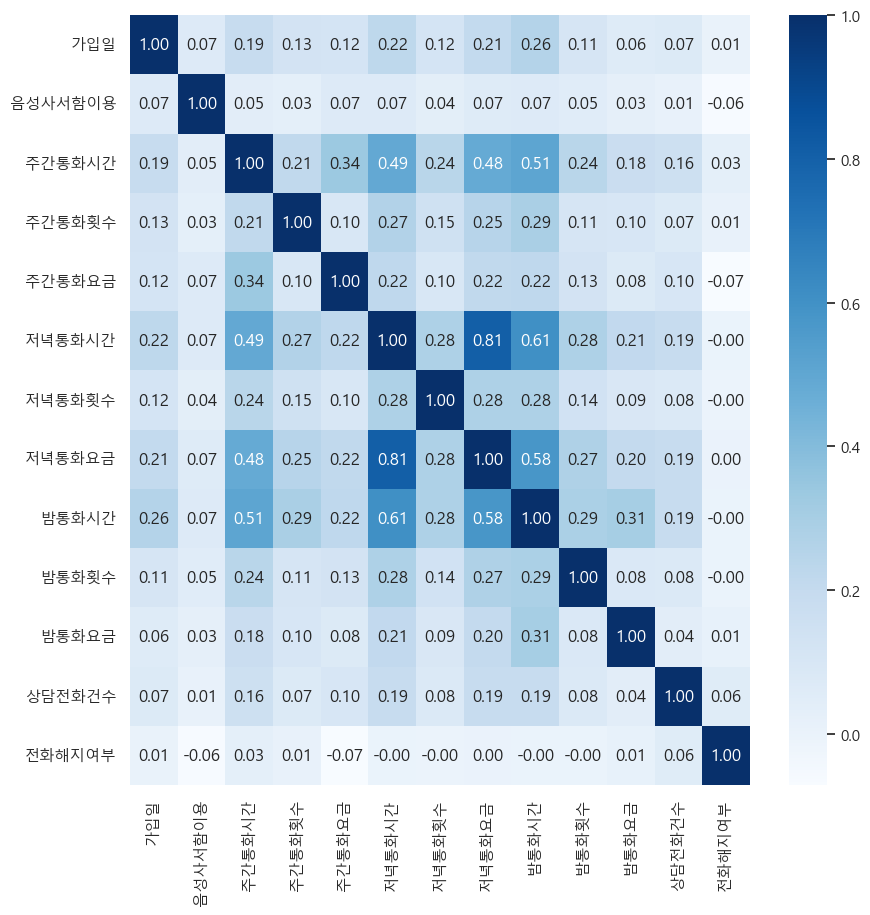

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), fmt=".2f", annot=True , cmap="Blues")
plt.show()

In [23]:
train['전화해지여부'].value_counts()

0    26882
1     3318
Name: 전화해지여부, dtype: int64

In [21]:
train['ID'].nunique()

30200

In [22]:
train.shape[0]

30200

## target

In [13]:
large_col = train.corr().nlargest(6, '전화해지여부').index.values
small_col = train.corr().nsmallest(5, '전화해지여부').index.values
print(large_col, small_col)

['전화해지여부' '상담전화건수' '주간통화시간' '밤통화요금' '주간통화횟수' '가입일'] ['주간통화요금' '음성사서함이용' '저녁통화횟수' '밤통화횟수' '밤통화시간']


In [18]:
large_col = ['전화해지여부', '상담전화건수', '주간통화시간', '밤통화요금', '주간통화횟수', '가입일'] 
small_col = ['주간통화요금', '음성사서함이용', '저녁통화횟수', '밤통화횟수', '밤통화시간']

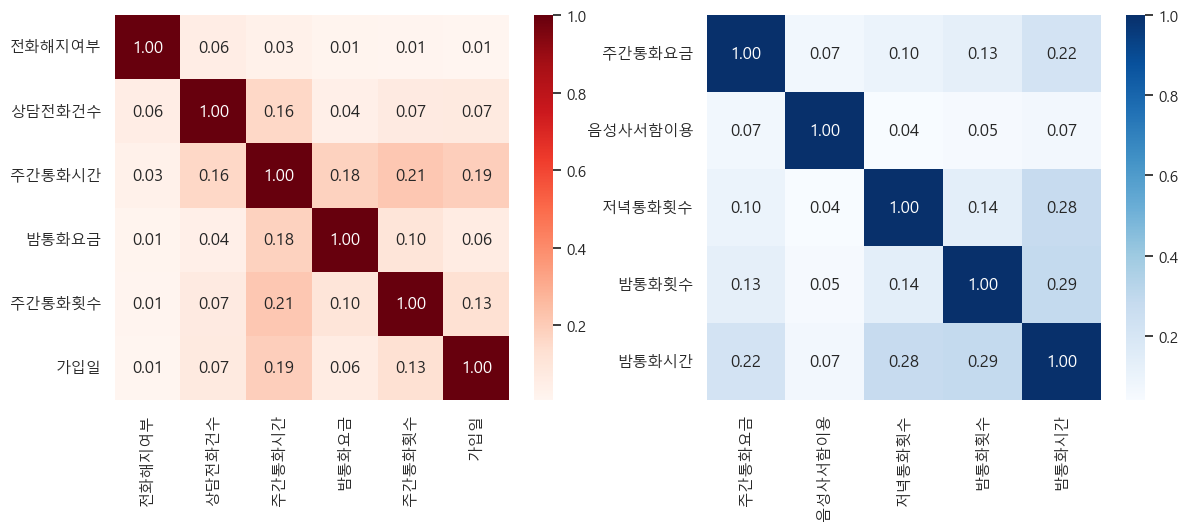

In [20]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.heatmap(train[large_col].corr(), fmt=".2f", cmap="Reds",  annot=True, ax=axes[0])
sns.heatmap(train[small_col].corr(), fmt=".2f", cmap="Blues", annot=True, ax=axes[1])
plt.show()

In [41]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12943 entries, 0 to 12942
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       12943 non-null  object

(None, None)

In [48]:
a = train[train['전화해지여부']==0].describe().T
b = train[train['전화해지여부']==1].describe().T

In [49]:
df = pd.concat([a,b],axis=1)

In [50]:
df

,count,mean,std,min,25%,50%,75%,max,count,mean,std,min,25%,50%,75%,max
가입일,26882.0,159.441857,124.193729,1.00,63.00,116.00,228.00,2212.00,3318.0,162.088608,120.112890,1.00,67.00,135.00,229.000,2012.00
음성사서함이용,26882.0,12.587159,25.566918,0.00,0.00,1.00,23.00,1112.00,3318.0,7.587101,18.348552,0.00,0.00,1.00,1.000,117.00
주간통화시간,26882.0,249.674619,84.830161,0.00,222.50,233.60,289.40,481.20,3318.0,257.764708,80.513591,0.10,224.20,250.25,290.800,481.90
주간통화횟수,26882.0,158.784131,101.747847,0.00,88.00,115.00,223.00,489.00,3318.0,162.348403,100.104352,0.00,88.00,143.00,223.000,489.00
주간통화요금,26882.0,41.669660,23.536478,0.00,24.50,31.20,46.20,118.60,3318.0,36.406841,19.427776,0.10,24.00,29.80,40.575,117.80
저녁통화시간,26882.0,263.251451,74.741785,0.10,223.70,242.95,290.40,481.60,3318.0,263.212899,68.344831,21.10,223.90,244.10,289.900,481.40
저녁통화횟수,26882.0,158.628078,102.359429,0.00,87.00,112.00,223.00,489.00,3318.0,157.230561,100.908386,20.00,87.00,111.00,223.000,489.00
저녁통화요금,26882.0,25.389364,8.223539,0.00,22.22,23.30,28.82,49.98,3318.0,25.433927,7.490529,2.29,22.22,23.32,28.880,49.89
밤통화시간,26882.0,263.512730,74.529181,20.80,223.70,242.70,290.50,481.80,3318.0,262.835142,67.395499,22.60,223.70,244.30,290.100,481.00
밤통화횟수,26882.0,157.158954,101.785060,20.00,87.00,107.00,222.00,490.00,3318.0,156.143761,101.216735,20.00,83.00,110.00,223.000,488.00


In [51]:
del df

In [52]:
df = train.copy()

In [56]:
df.columns

Index(['ID', '가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간',
       '저녁통화횟수', '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수', '전화해지여부'],
      dtype='object')

In [ ]:
y=df['전화해지여부']
X=df.drop(['ID', '가입일', '주간통화시간', '주간통화횟수', '주간통화요금', '밤통화횟수', '상담전화건수'],axis=1)




## 학습 & 평가

In [26]:
c1_size = len(train[train['전화해지여부']==1])
c1_size

3318

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [39]:
y1 = train['전화해지여부']
X1 = train.drop(['전화해지여부','ID'],axis=1)
DTC = DecisionTreeClassifier(random_state=11)
X1_train, X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=c1_size,random_state=11)
DTC.fit(X1_train, y1_train)
y1_pred = DTC.predict(X1_test)

score_under     = accuracy_score(y1_test, y1_pred)
f1_under        = f1_score(y1_test, y1_pred, average='binary')
precision_under = precision_score(y1_test, y1_pred, average='binary')
recall_under    = recall_score(y1_test, y1_pred, average='binary')

print(confusion_matrix(y1_test, y1_pred) )
print(f"accuracy : {score_under:.5f} / f1 : {f1_under:.5} / precision : {precision_under:.5} / recall : {recall_under:.5}")

[[2778  171]
 [ 184  185]]
accuracy : 0.89301 / f1 : 0.51034 / precision : 0.51966 / recall : 0.50136


In [59]:
y1=df['전화해지여부']
X1=df.drop(['ID', '가입일', '주간통화시간', '주간통화횟수', '주간통화요금', '밤통화횟수', '상담전화건수','전화해지여부'],axis=1)
DTC = DecisionTreeClassifier(random_state=11)
X1_train, X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=c1_size,random_state=11)
DTC.fit(X1_train, y1_train)
y1_pred = DTC.predict(X1_test)

score_under     = accuracy_score(y1_test, y1_pred)
f1_under        = f1_score(y1_test, y1_pred, average='binary')
precision_under = precision_score(y1_test, y1_pred, average='binary')
recall_under    = recall_score(y1_test, y1_pred, average='binary')

print(confusion_matrix(y1_test, y1_pred) )
print(f"accuracy : {score_under:.5f} / f1 : {f1_under:.5} / precision : {precision_under:.5} / recall : {recall_under:.5}")

[[2741  208]
 [ 199  170]]
accuracy : 0.87734 / f1 : 0.45515 / precision : 0.44974 / recall : 0.4607


## Over Sampling
    * 적은양의 데이터쪽을 증강시킴.(일반적으로 사용.)

## 학습 & 평가

In [35]:
y_s = train['전화해지여부']
X_s = train.drop(['전화해지여부','ID'], axis=1)
from imblearn.over_sampling import SMOTE
X_o, y_o = SMOTE(sampling_strategy='auto', random_state=2021).fit_resample(X_s,y_s)
print(  len(X_s), len(y_s) )

y_s.value_counts()

30200 30200


0    26882
1     3318
Name: 전화해지여부, dtype: int64

In [38]:
DTC = DecisionTreeClassifier(random_state=11)
Xo_tr, Xo_ts,yo_tr,yo_ts = train_test_split(X_o,y_o,test_size=0.2,random_state=11)
DTC.fit(Xo_tr, yo_tr)
yo_pred = DTC.predict(Xo_ts)
score_over = accuracy_score(yo_ts, yo_pred)
ㅊ
score_over     = accuracy_score(yo_ts, yo_pred)
f1_over        = f1_score(yo_ts, yo_pred, average='binary')
precision_over = precision_score(yo_ts, yo_pred, average='binary')
recall_over    = recall_score(yo_ts, yo_pred, average='binary')

print(confusion_matrix(yo_ts, yo_pred) )
print(f"accuracy : {score_over:.5f} / f1 : {f1_over:.5} / precision : {precision_over:.5} / recall : {recall_over:.5}")

[[4801  696]
 [ 509 4747]]
accuracy : 0.88794 / f1 : 0.88737 / precision : 0.87213 / recall : 0.90316


In [60]:
y_s=df['전화해지여부']
X_s=df.drop(['ID', '가입일', '주간통화시간', '주간통화횟수', '주간통화요금', '밤통화횟수', '상담전화건수','전화해지여부'],axis=1)
from imblearn.over_sampling import SMOTE
X_o, y_o = SMOTE(sampling_strategy='auto', random_state=2021).fit_resample(X_s,y_s)
print(  len(X_s), len(y_s) )

y_s.value_counts()

30200 30200


0    26882
1     3318
Name: 전화해지여부, dtype: int64

In [62]:
DTC = DecisionTreeClassifier(random_state=11)
Xo_tr, Xo_ts,yo_tr,yo_ts = train_test_split(X_o,y_o,test_size=0.2,random_state=11)
DTC.fit(Xo_tr, yo_tr)
yo_pred = DTC.predict(Xo_ts)
score_over = accuracy_score(yo_ts, yo_pred)

score_over     = accuracy_score(yo_ts, yo_pred)
f1_over        = f1_score(yo_ts, yo_pred, average='binary')
precision_over = precision_score(yo_ts, yo_pred, average='binary')
recall_over    = recall_score(yo_ts, yo_pred, average='binary')

print(confusion_matrix(yo_ts, yo_pred) )
print(f"accuracy : {score_over:.5f} / f1 : {f1_over:.5} / precision : {precision_over:.5} / recall : {recall_over:.5}")

[[4667  830]
 [ 690 4566]]
accuracy : 0.85864 / f1 : 0.8573 / precision : 0.84618 / recall : 0.86872
